<a href="https://colab.research.google.com/github/kumarUjjawal/deep-learning-with-fastai/blob/master/vision/single-label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Fast ai Library for Computer Vision Tasks

<b> Build a model using Learner and fine tune a pretrained model on computer vision tasks.

In [1]:
from fastai.vision.all import *

In [2]:

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
! pip install fastbook

## Single-label Classification

In [4]:
import fastbook

In [5]:
! pip install fastai

We'll use Oxford-IIIT Pet Dataset to build a cats-vs-dogs classifier and then we'll build a breed classifier.

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
images = get_image_files(path/"images")

In [9]:
len(images)

7390

In [10]:
def label_func(f): return f[0].isupper()

In [11]:
# Get our data ready for the model.
data = ImageDataLoaders.from_name_func(path, images, label_func, item_tfms=Resize(224), num_workers=0)

In [12]:
learn = cnn_learner(data, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.176425,0.027546,0.008796,01:18


epoch,train_loss,valid_loss,error_rate,time
0,0.058213,0.013081,0.004060,01:34


In [14]:
learn.predict(images[0])

('False', tensor(0), tensor([9.9997e-01, 3.1839e-05]))

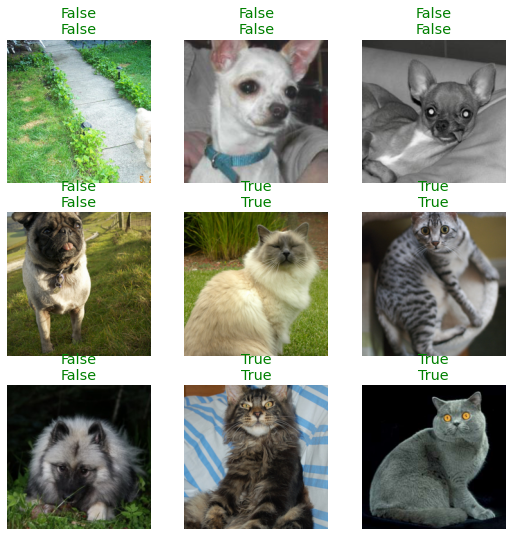

In [15]:
learn.show_results()

In [17]:
## Classifying Breeds

In [20]:
images[0].name

'boxer_135.jpg'

In [21]:
pat = r'^(.*)_\d+.jpg'

In [23]:
dls = ImageDataLoaders.from_name_re(path, images, pat, item_tfms=Resize(224))

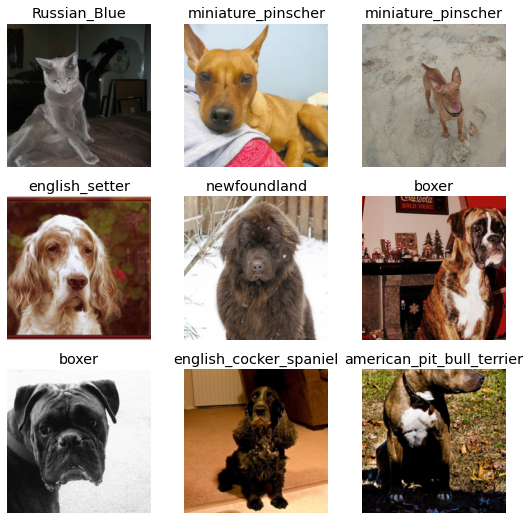

In [24]:
dls.show_batch()

In [27]:
dls = ImageDataLoaders.from_name_re(path, images, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

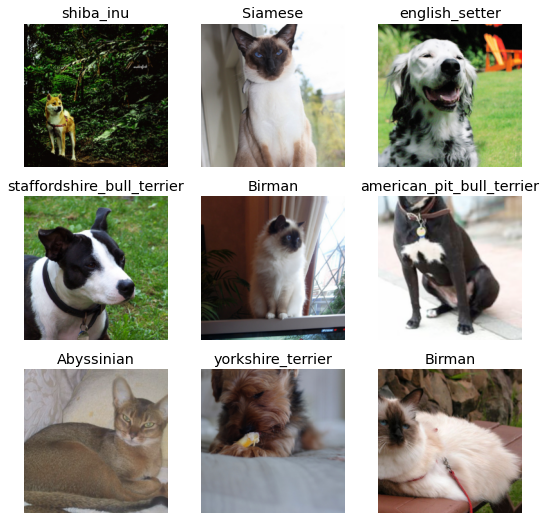

In [28]:
dls.show_batch()

In [29]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

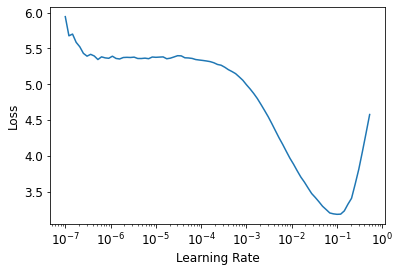

In [30]:
learn.lr_find()

In [31]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.308189,0.263488,0.084574,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.555415,0.310789,0.100135,01:12
1,0.305978,0.204820,0.066306,01:12


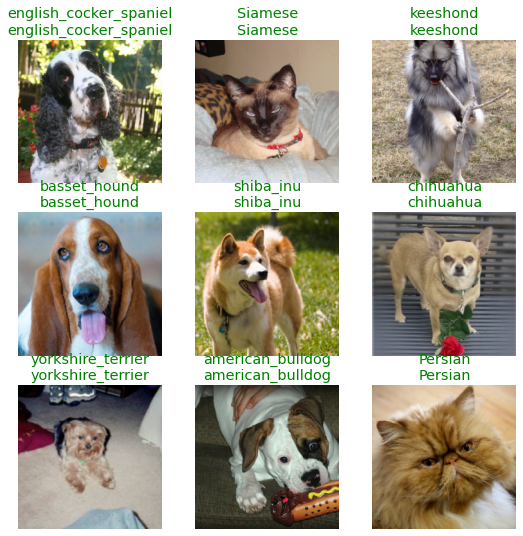

In [32]:
learn.show_results()

In [33]:
# check where the model made the worst predictions
interp = Interpretation.from_learner(learn)

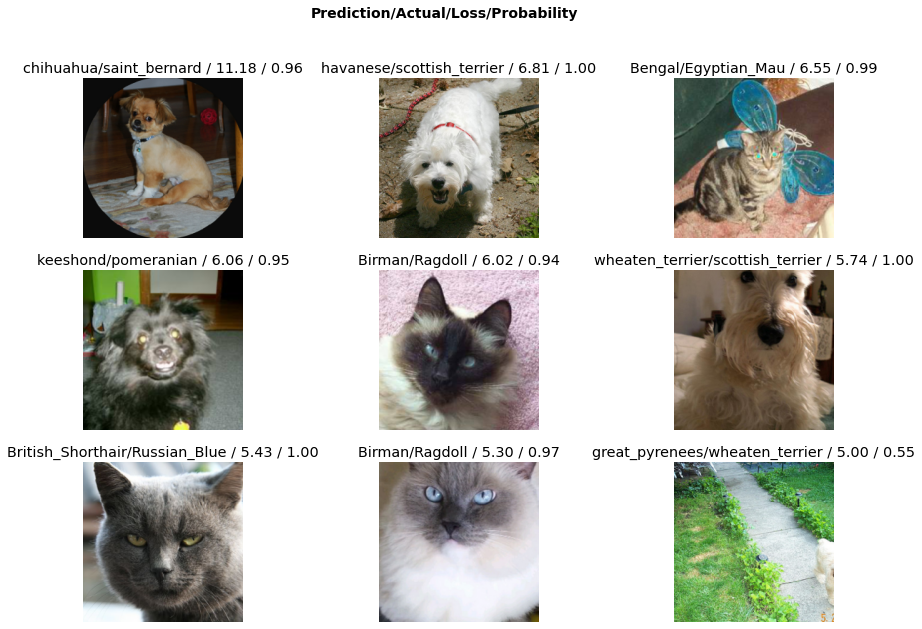

In [34]:
interp.plot_top_losses(9, figsize=(15,10))

Data Block API

In [36]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items= get_image_files,
                 splitter = RandomSplitter(),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=(224)))

In [37]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

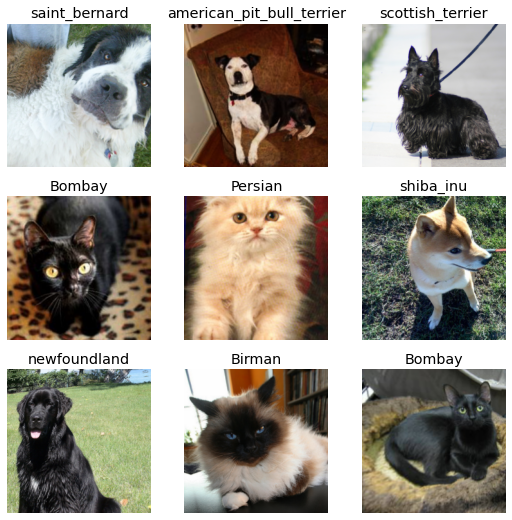

In [38]:
dls.show_batch()